# Correlations between audio features

All with all correlations (creating the correlation map between each attribute, the objective of this is to see if any of the song characteristics correlate with each other.
Which attribute is most important for making a song popular? → Aaron/Tianchi

In this notebook, we will create a correlation matrix using all the audio features and popularity scores for every song in the dataset. The objective is to understand if certain audio features correlate with each other, or in other words, if some audio features tend to be prevalent and come together throughout time.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn # for plotting correlation matrix

In [2]:
# Load data
file = '../cleaned_data/cleaned_data.csv'
df = pd.read_csv(file)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920


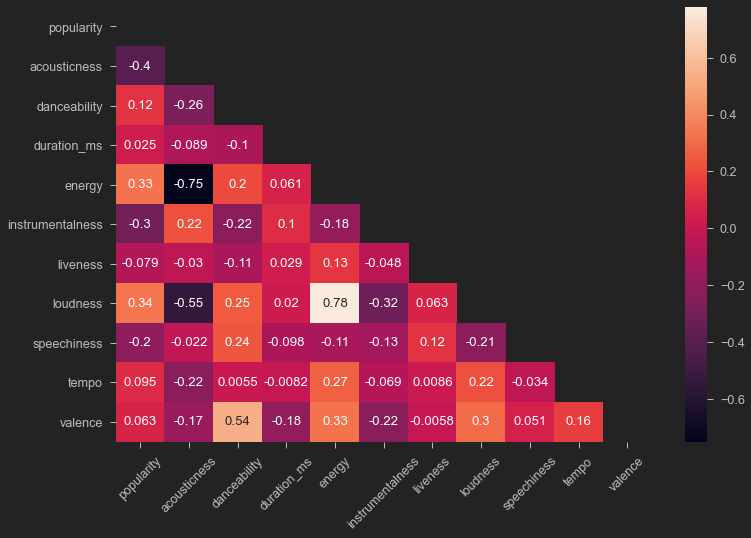

In [3]:
# Select numeric values from the dataframe to be included in a correlation matrix.
# "explicit", "key", "mode", and "year" will not be selected
corr_matrix = df[['popularity', 'acousticness', 'danceability', 'duration_ms',
                  'energy', 'instrumentalness', 'liveness', 'loudness',
                  'speechiness', 'tempo', 'valence']].corr()

# Use mask to hide the upper triangle because it's duplicated
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,8))
heatmap = sn.heatmap(corr_matrix, mask=mask, annot=True)
plt.xticks(rotation=45)

plt.show()

figure = heatmap.get_figure()
figure.savefig('../images/corr_heatmap.png')

###### Acoustic definition: Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means.

#### Note-worthy correlations:

1. Valence vs. Danceability = 0.54 --> The more positive a song is, the more danceable.
2. Loudness vs. Acousticness = -0.55 --> The louder a song is, the less acoustic.
3. Loudness vs. Energy = 0.78 --> The louder a song is, the more energetic.
4. Energy vs. Acousticness = -0.75 --> The more energetic a song is, the less acoustic


#### Conclusion: 

1. Songs that feed off more positive vibes (high valence) could suggest people are more willing to dance to them. This makes sense because both music and dancing are ways of expressing oneself through sounds and body movements. Expression is at it core a form of love-sharing. Love is a positive thing. So songs with high valence scores tend to be perceived as more "danceable".
2. Audio volume and energy level in a song go hand in hand, but the high end of these two attributes indicate a low acousticness. Electronic music is good representations of  low acoustic audio because it is not primarily created using musical instruments that produce sounds through acoustic means but rather using electronic means through mixing different elements of sounds.

### Popularity vs. Audio features

In the next part of this analysis we will dive deeper into the correlationS between popularity and various audio features. The objective is to find out if the highs and lows of any audio feature could potentially "predict" a song's popularity.

###### In other words, the question we will try to answer is: what types of songs are more popular?

# Correlations between audio features and popularity

In [4]:
corr_matrix

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.396744,0.123746,0.024717,0.328939,-0.300625,-0.078959,0.337194,-0.195329,0.094985,0.063471
acousticness,-0.396744,1.000000,-0.263217,-0.089169,-0.750852,0.221956,-0.029654,-0.546639,-0.022437,-0.223840,-0.166968
danceability,0.123746,-0.263217,1.000000,-0.100757,0.204838,-0.215589,-0.110033,0.249541,0.239962,0.005479,0.536713
duration_ms,0.024717,-0.089169,-0.100757,1.000000,0.060516,0.103621,0.028942,0.019791,-0.097838,-0.008182,-0.183199
energy,0.328939,-0.750852,0.204838,0.060516,1.000000,-0.177750,0.134815,0.779267,-0.112616,0.266448,0.326418
instrumentalness,-0.300625,0.221956,-0.215589,0.103621,-0.177750,1.000000,-0.047941,-0.317562,-0.133966,-0.068656,-0.219188
liveness,-0.078959,-0.029654,-0.110033,0.028942,0.134815,-0.047941,1.000000,0.062695,0.122034,0.008586,-0.005781
loudness,0.337194,-0.546639,0.249541,0.019791,0.779267,-0.317562,0.062695,1.000000,-0.213504,0.217914,0.302520
speechiness,-0.195329,-0.022437,0.239962,-0.097838,-0.112616,-0.133966,0.122034,-0.213504,1.000000,-0.033530,0.050600
tempo,0.094985,-0.223840,0.005479,-0.008182,0.266448,-0.068656,0.008586,0.217914,-0.033530,1.000000,0.163118


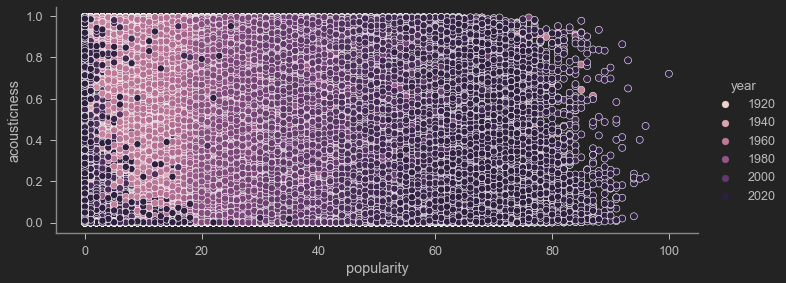

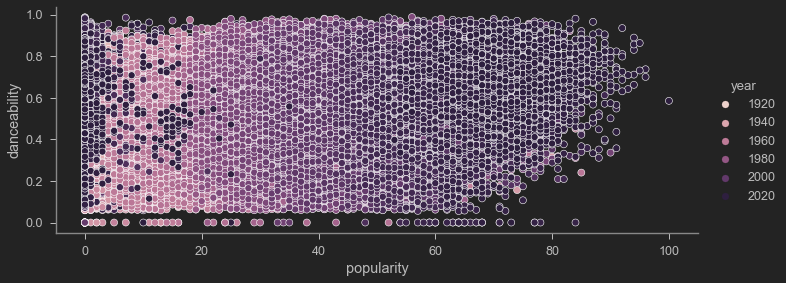

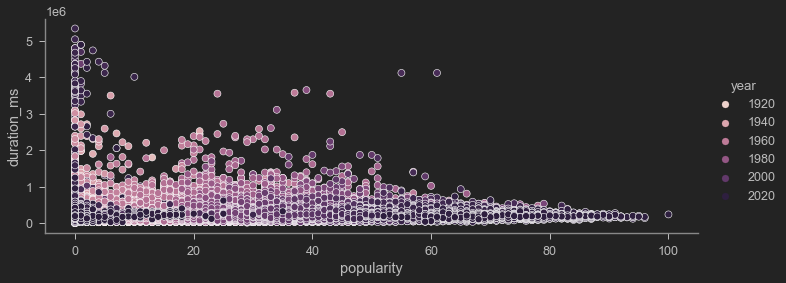

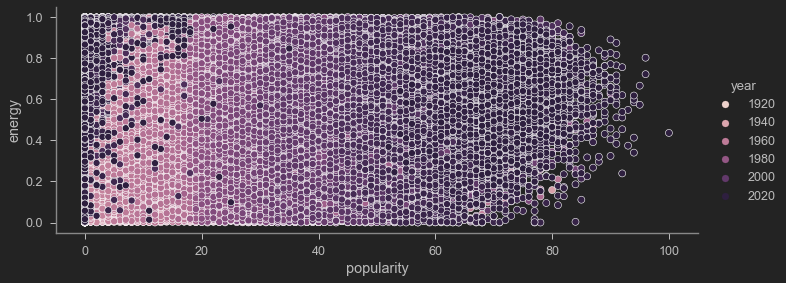

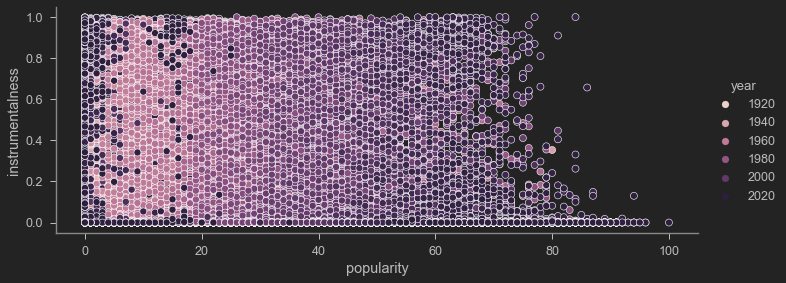

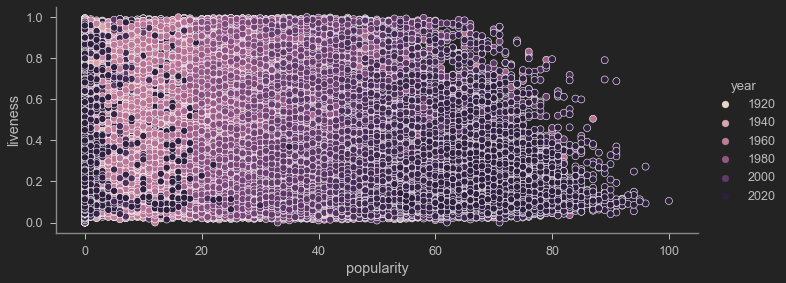

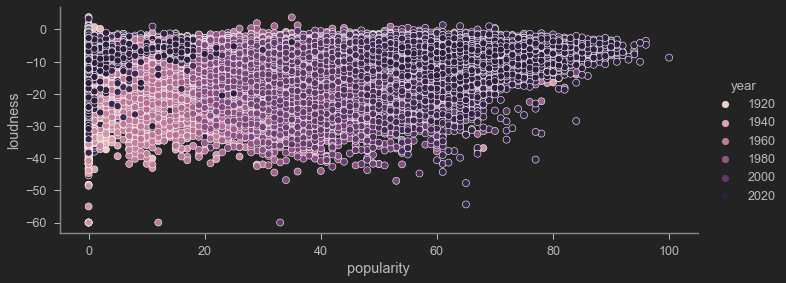

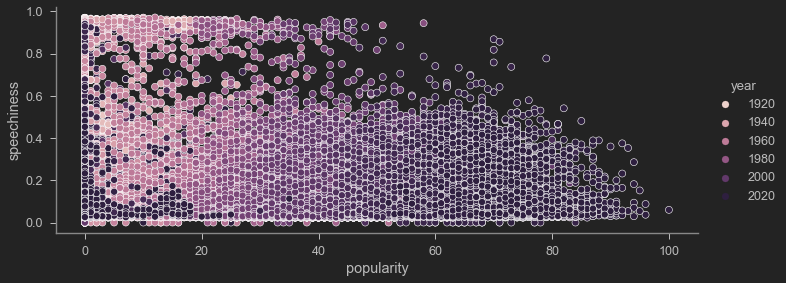

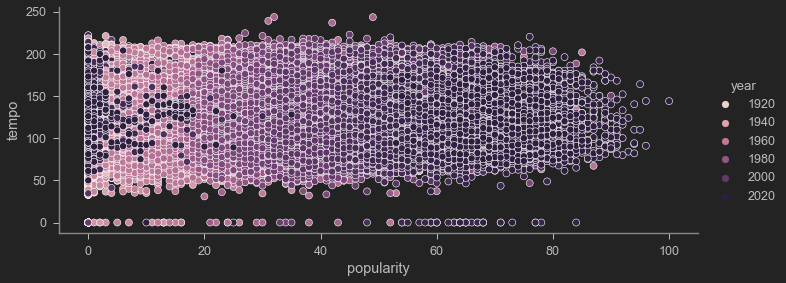

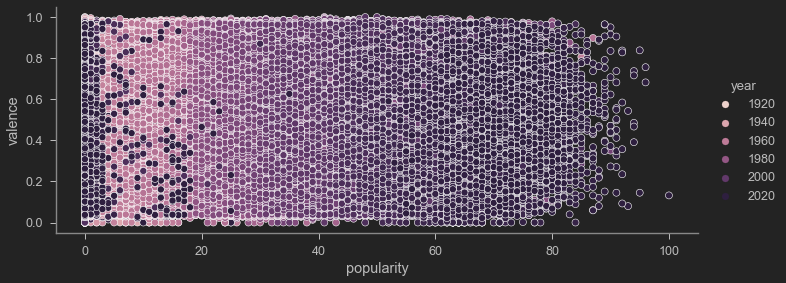

In [12]:
# scatter plot of popularity vs all other variables 
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['acousticness'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['danceability'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['duration_ms'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['energy'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['instrumentalness'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['liveness'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['loudness'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['speechiness'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['tempo'],
                     hue='year', height = 4, aspect = 2.5)
sn.pairplot(df, x_vars = ['popularity'], 
                      y_vars = ['valence'],
                     hue='year', height = 4, aspect = 2.5)

# Save figure
scatter.savefig('../images/popularity_scatter.png')

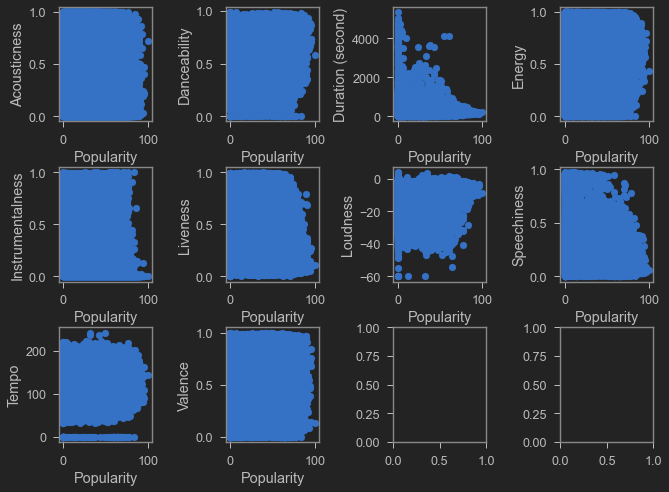

In [6]:
# Alternative, a snapshot for presentation
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

axs[0, 0].scatter(df['popularity'], df['acousticness'])
axs[0, 0].set_ylabel('Acousticness')
axs[0, 0].set_xlabel('Popularity')

axs[0, 1].scatter(df['popularity'], df['danceability'])
axs[0, 1].set_ylabel('Danceability')
axs[0, 1].set_xlabel('Popularity')

axs[0, 2].scatter(df['popularity'], df['duration_ms']/1000)
axs[0, 2].set_ylabel('Duration (second)')
axs[0, 2].set_xlabel('Popularity')

axs[0, 3].scatter(df['popularity'], df['energy'])
axs[0, 3].set_ylabel('Energy')
axs[0, 3].set_xlabel('Popularity')

axs[1, 0].scatter(df['popularity'], df['instrumentalness'])
axs[1, 0].set_ylabel('Instrumentalness')
axs[1, 0].set_xlabel('Popularity')

axs[1, 1].scatter(df['popularity'], df['liveness'])
axs[1, 1].set_ylabel('Liveness')
axs[1, 1].set_xlabel('Popularity')

axs[1, 2].scatter(df['popularity'], df['loudness'])
axs[1, 2].set_ylabel('Loudness')
axs[1, 2].set_xlabel('Popularity')

axs[1, 3].scatter(df['popularity'], df['speechiness'])
axs[1, 3].set_ylabel('Speechiness')
axs[1, 3].set_xlabel('Popularity')

axs[2, 0].scatter(df['popularity'], df['tempo'])
axs[2, 0].set_ylabel('Tempo')
axs[2, 0].set_xlabel('Popularity')

axs[2, 1].scatter(df['popularity'], df['valence'])
axs[2, 1].set_ylabel('Valence')
axs[2, 1].set_xlabel('Popularity')

# Adjust aesthetics so labels don't overlap with each other
fig.subplots_adjust(right=0.95, hspace=0.4, wspace=0.8)

plt.show()

# Save figure
fig.savefig('../images/popularity_scatter_grid.png')